In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams["font.size"] = 18

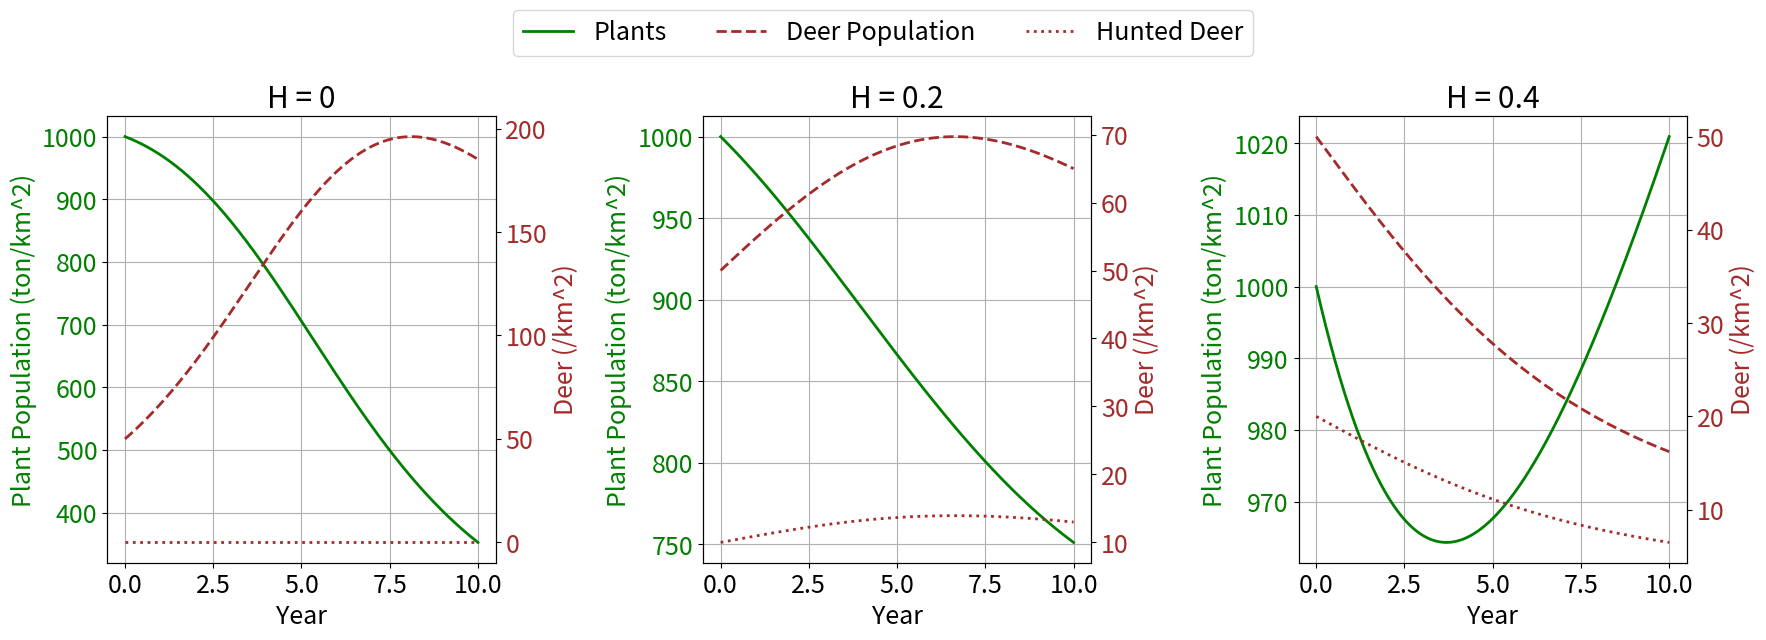

In [73]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

p0_ratio = 1
# Initial conditions
p0 = 10**6 * p0_ratio  # Initial plant population
x0 = 50     # Initial deer population
initial_state = [p0, x0]

# Parameter settings
T = 10
r = 0.1      # Plant growth rate
K = p0 * 1.5 # Carrying capacity of the environment for plants
alpha = 1095 / p0  # Deer grazing rate
beta = alpha * 0.0005 # Deer growth efficiency
gamma = 1/4   # Deer natural death rate
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Initial conditions
p0_ratio = 1
p0 = 10**6 * p0_ratio  # Initial plant population
x0 = 50                # Initial deer population
initial_state = [p0, x0]

# Parameter settings
T = 10
r = 0.1      # Plant growth rate
K = p0 * 1.5 # Carrying capacity of the environment for plants
alpha = 1095 / p0  # Deer grazing rate
beta = alpha * 0.0005 # Deer growth efficiency
gamma = 1/4   # Deer natural death rate

# Hunting rates to compare
hunting_rates = [0, 0.2, 0.4]
titles = [f"H = {H}" for H in hunting_rates]

# Create a figure with subplots for side-by-side comparison with dual axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, H, title in zip(axes, hunting_rates, titles):
    # Redefine the system of equations with current H
    def ecosystem_with_logistic_growth(state, t):
        p, x = state  # p: plant population, x: deer population
        dpdt = r * p * (1 - p / K) - alpha * p * x  # Logistic growth
        dxdt = beta * p * x - gamma * x - H * x
        return [dpdt, dxdt]

    # Time range
    t = np.linspace(0, T, 1000)

    # Solve differential equations
    solution = odeint(ecosystem_with_logistic_growth, initial_state, t)
    p, x = solution.T  # Separate plant and deer results

    # Calculate hunted deer
    hunted_deer = H * x

    # Plot plants and deer on dual axes
    ax1 = ax
    ax2 = ax1.twinx()

    plant_line, = ax1.plot(t, p / 1e3, label="Plants (ton/km^2)", color='green', linewidth=2)
    deer_line, = ax2.plot(t, x, label="Deer Population", color='brown', linestyle='--', linewidth=2)
    hunted_line, = ax2.plot(t, hunted_deer, label="Hunted Deer", color='brown', linestyle=':', linewidth=2)

    # Labels and title
    ax1.set_title(title)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Plant Population (ton/km^2)", color='green')
    ax2.set_ylabel("Deer (/km^2)", color='brown')

    # Tick colors
    ax1.tick_params(axis='y', labelcolor='green')
    ax2.tick_params(axis='y', labelcolor='brown')

    # Grid and layout
    ax1.grid()

# Set legend for all plots
fig.legend([plant_line, deer_line, hunted_line],
           ["Plants", "Deer Population", "Hunted Deer"],
           loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.1))
plt.tight_layout()
plt.show()